# Municipality Geoanalysis

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_B_M = pd.read_csv('datos_sinnorm_sinimput.csv') 
df_B_M = df_B_M.loc[:, ~df_B_M.columns.str.contains('^Unnamed')]
df_B_M.head()

,end_date,created_on,lat,lon,bedrooms,bathrooms,surface_total,price,property_type,delta_time,medellin
0,4/23/2019,9/14/2018,6.250242,-75.588402,NaN,3.0,250,21.023370,Casa,221,1
1,4/10/2019,9/14/2018,4.736885,-74.023945,NaN,3.0,72,19.879296,Casa,208,0
2,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,134,19.519293,Casa,11,1
3,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,588,19.701615,Casa,11,1
4,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,160,20.125429,Casa,11,1


In [3]:
df_B_M.shape

(77205, 11)

# Data Cleaning - Filtering Medellin located uniquely

In [4]:
df_M = df_B_M.loc[df_B_M['medellin'] == 1]
print('Data marked as belonging to Medellin: ', df_M.shape[0])
df_M = df_M.dropna(subset = ['lat', 'lon'])
print('Data that has coordinates: ', df_M.shape[0])

Data marked as belonging to Medellin:  25093
Data that has coordinates:  18988


In [5]:
# Outliers Elimination
df_M = df_M.loc[df_M['lat'] >= 6.1]
df_M = df_M.loc[df_M['lat'] <= 6.4]
df_M = df_M.loc[df_M['lon'] >= -75.71034908]
df_M = df_M.loc[df_M['lon'] <= -75.4]

In [7]:
# Creating the GeoDataFrame using the coordinates available
gdf_geom = gpd.GeoDataFrame(df_M.copy(), geometry = gpd.points_from_xy(df_M.lon, df_M.lat), crs={'init': 'epsg:4326'})
# Loading the map that contains division of districts in Medellin 
sectores = gpd.read_file('C:/Users/danie/Documents/Daniel/Universidad/SIMAT/Límite_Catastral_de__Comunas_y_Corregimientos/Límite_Catastral_de__Comunas_y_Corregimientos.shp')

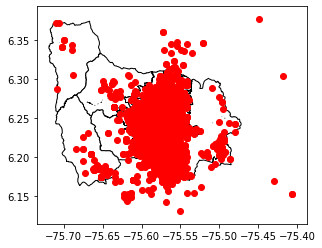

In [8]:
# Plotting all the points in the map
ax = sectores.plot(color='white', edgecolor='black')
gdf_geom.plot(ax = ax, color = 'red')

# Selecting the points located within the map

In [9]:
sectores_con_puntos_de_venta = gpd.sjoin(gdf_geom, sectores, how = "left", op = 'intersects')
sectores_con_puntos_de_venta_Medellin = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta.isna()['SECTOR'].apply(lambda value: not value)]

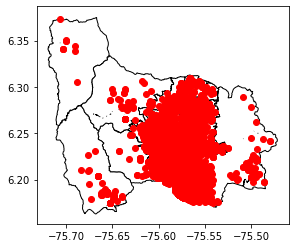

In [10]:
# Plotting the points within the map
ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_de_venta_Medellin.plot(ax = ax, color = 'red')

In [11]:
# Agregating a column to the original dataframe inidicating that the property is in Medellin
Medellin_Reales = np.zeros(df_B_M.shape[0])
for i in sectores_con_puntos_de_venta_Medellin.index:
    Medellin_Reales[i] = 1
df_B_M['Medellin Reales'] = Medellin_Reales

# Coordinates Imputation

In [12]:
# Dividing the dataset into data that actually is in Medellin and data with missing coordinates
df_M = df_B_M.loc[df_B_M['medellin'] == 1]
df_M_imput = df_M.loc[df_M['lat'].isna()].copy()
df_M_imput['imput'] = np.ones(df_M_imput.shape[0])
df_M_reales = df_M.loc[df_M['Medellin Reales'] == 1].copy()
df_M_reales['imput'] = np.zeros(df_M_reales.shape[0])

In [13]:
df_M.head()

,end_date,created_on,lat,lon,bedrooms,bathrooms,surface_total,price,property_type,delta_time,medellin,Medellin Reales
0,4/23/2019,9/14/2018,6.250242,-75.588402,NaN,3.0,250,21.023370,Casa,221,1,1.0
2,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,134,19.519293,Casa,11,1,0.0
3,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,588,19.701615,Casa,11,1,0.0
4,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,160,20.125429,Casa,11,1,0.0
5,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,90,19.583832,Otro,11,1,0.0


In [14]:
import random as rd
from random import uniform

# Data imputation
df_M_imput['lon'] = df_M_imput['lon'].apply(lambda x: uniform(-75.625,-75.54))
df_M_imput['lat'] = df_M_imput['lat'].apply(lambda x: uniform(6.302,6.20))

# Unifying the dataset 
df_M = df_M_imput.append(df_M_reales)
df_M.reset_index(inplace = True, drop = True)

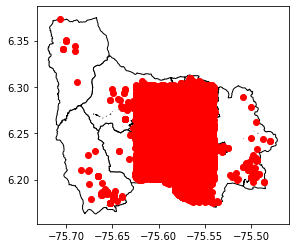

In [15]:
gdf_M = gpd.GeoDataFrame(df_M.copy(), geometry = gpd.points_from_xy(df_M.lon, df_M.lat), crs={'init': 'epsg:4326'})

ax = sectores.plot(color='white', edgecolor='black')
gdf_M.plot(ax = ax, color = 'red')

In [16]:
gdf_M.shape

(24880, 14)

# Selecting the points located within the map

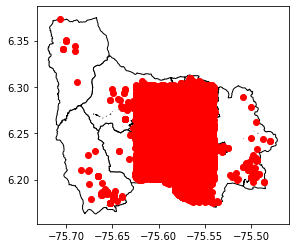

In [17]:
sectores_con_puntos_de_venta = gpd.sjoin(gdf_M, sectores, how = "left", op = 'intersects')
sectores_con_puntos_Medellin = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta.isna()['SECTOR'].apply(lambda value: not value)]

ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_Medellin.plot(ax = ax, color = 'red')

In [18]:
sectores_con_puntos_Medellin.shape

(24880, 21)

# Filtering the dataset

In [19]:
Medellin_Reales = np.zeros(df_M.shape[0])

for i in sectores_con_puntos_Medellin.index:
    Medellin_Reales[i] = 1
df_M['Medellin for real'] = Medellin_Reales

df_M = df_M.loc[df_M['Medellin for real'] == 1]

#Eliminamos las columnas medellin y medellin reales ya que no son necesarias
df_M = df_M.drop(['medellin', 'Medellin Reales', 'Medellin for real'], axis = 1)

# Reorganizando el orden del dataset por preferencia propia
df_M = df_M.reindex(columns = ['created_on', 'end_date', 'delta_time', 'lon', 'lat', 'bedrooms', 'bathrooms', 'surface_total', 'property_type', 'price', 'imput'])

In [20]:
df_M.head()

,created_on,end_date,delta_time,lon,lat,bedrooms,bathrooms,surface_total,property_type,price,imput
0,9/14/2018,9/25/2018,11,-75.577025,6.211360,NaN,NaN,134,Casa,19.519293,1.0
1,9/14/2018,9/25/2018,11,-75.572928,6.234350,NaN,NaN,588,Casa,19.701615,1.0
2,9/14/2018,9/25/2018,11,-75.553186,6.237236,NaN,NaN,160,Casa,20.125429,1.0
3,9/14/2018,9/25/2018,11,-75.594599,6.226078,NaN,NaN,90,Otro,19.583832,1.0
4,9/14/2018,9/25/2018,11,-75.542267,6.205542,NaN,NaN,101,Otro,19.781657,1.0


# Encoding type of property

In [21]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder(categories = 'auto')
df_M['property_type'] = le.fit_transform(df_M['property_type'])

In [22]:
df_M.property_type.unique()

array([1, 7, 0, 8, 6, 5, 3, 2, 4], dtype=int64)

In [23]:
out = ohe.fit_transform(df_M['property_type'].values[:,None])
out_array = out.toarray()
ohe_cols = []

for category in ohe.categories_[0]:
    col_add = str(le.classes_[category])
    ohe_cols.append(col_add)
    df_M[col_add] = out_array[:,int(category)]
    
df_M = df_M.drop(['property_type'],axis = 1)

In [24]:
df_M.head()

,created_on,end_date,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,imput,Apartamento,Casa,Depósito,Finca,Local comercial,Lote,Oficina,Otro,Parqueadero
0,9/14/2018,9/25/2018,11,-75.577025,6.211360,NaN,NaN,134,19.519293,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9/14/2018,9/25/2018,11,-75.572928,6.234350,NaN,NaN,588,19.701615,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9/14/2018,9/25/2018,11,-75.553186,6.237236,NaN,NaN,160,20.125429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9/14/2018,9/25/2018,11,-75.594599,6.226078,NaN,NaN,90,19.583832,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9/14/2018,9/25/2018,11,-75.542267,6.205542,NaN,NaN,101,19.781657,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Encoding Districts

In [25]:
sectores_con_puntos_Medellin.head()

,end_date,created_on,lat,lon,bedrooms,bathrooms,surface_total,price,property_type,delta_time,...,Medellin Reales,imput,geometry,index_right,OBJECTID,COMUNA,SECTOR,SHAPEAREA,SHAPELEN,NOMBRE
0,9/25/2018,9/14/2018,6.211360,-75.577025,NaN,NaN,134,19.519293,Casa,11,...,0.0,1.0,POINT (-75.57702 6.21136),7,8,14,5,1.451372e+07,21923.200475,EL POBLADO
1,9/25/2018,9/14/2018,6.234350,-75.572928,NaN,NaN,588,19.701615,Casa,11,...,0.0,1.0,POINT (-75.57293 6.23435),15,16,10,3,7.359512e+06,13743.551828,LA CANDELARIA
2,9/25/2018,9/14/2018,6.237236,-75.553186,NaN,NaN,160,20.125429,Casa,11,...,0.0,1.0,POINT (-75.55319 6.23724),12,13,09,3,6.007778e+06,21065.795178,BUENOS AIRES
3,9/25/2018,9/14/2018,6.226078,-75.594599,NaN,NaN,90,19.583832,Otro,11,...,0.0,1.0,POINT (-75.59460 6.22608),14,15,16,6,8.660176e+06,24766.651613,BELEN
4,9/25/2018,9/14/2018,6.205542,-75.542267,NaN,NaN,101,19.781657,Otro,11,...,0.0,1.0,POINT (-75.54227 6.20554),11,12,90,9,7.464116e+07,74280.446354,SANTA ELENA


In [26]:
nombres = sectores_con_puntos_Medellin.NOMBRE.unique()
print(nombres)

['EL POBLADO' 'LA CANDELARIA' 'BUENOS AIRES' 'BELEN' 'SANTA ELENA'
 'SAN JAVIER' 'ROBLEDO' 'GUAYABAL' 'VILLA HERMOSA' 'ALTAVISTA' 'ARANJUEZ'
 'LAURELES' 'LA AMERICA' 'DOCE DE OCTUBRE' 'SAN CRISTOBAL' 'MANRIQUE'
 'CASTILLA' 'POPULAR' 'SANTA CRUZ' 'SAN ANTONIO DE PRADO' 'PALMITAS']


In [27]:
sectores_con_puntos_Medellin['NOMBRE'] = le.fit_transform(sectores_con_puntos_Medellin['NOMBRE'])

out = ohe.fit_transform(sectores_con_puntos_Medellin['NOMBRE'].values[:,None])
out_array = out.toarray()
ohe_cols = []

for category in ohe.categories_[0]:
    col_add = str(le.classes_[category])
    ohe_cols.append(col_add)
    df_M[col_add] = out_array[:,int(category)]

In [28]:
df_M.head()

,created_on,end_date,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,imput,...,MANRIQUE,PALMITAS,POPULAR,ROBLEDO,SAN ANTONIO DE PRADO,SAN CRISTOBAL,SAN JAVIER,SANTA CRUZ,SANTA ELENA,VILLA HERMOSA
0,9/14/2018,9/25/2018,11,-75.577025,6.211360,NaN,NaN,134,19.519293,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9/14/2018,9/25/2018,11,-75.572928,6.234350,NaN,NaN,588,19.701615,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9/14/2018,9/25/2018,11,-75.553186,6.237236,NaN,NaN,160,20.125429,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9/14/2018,9/25/2018,11,-75.594599,6.226078,NaN,NaN,90,19.583832,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9/14/2018,9/25/2018,11,-75.542267,6.205542,NaN,NaN,101,19.781657,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# df_M.to_csv('datos_analisis_por_comuna.csv')

# Data Visualization

In [30]:
# Separating the real data
df_real = df_M.loc[df_M['imput'] == 0]
df_real.head()

,created_on,end_date,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,imput,...,MANRIQUE,PALMITAS,POPULAR,ROBLEDO,SAN ANTONIO DE PRADO,SAN CRISTOBAL,SAN JAVIER,SANTA CRUZ,SANTA ELENA,VILLA HERMOSA
6105,9/14/2018,4/23/2019,221,-75.588402,6.250242,NaN,3.0,250,21.023370,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6106,9/14/2018,11/13/2018,60,-75.567000,6.249000,NaN,2.0,280,21.976029,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6107,9/14/2018,11/13/2018,60,-75.568000,6.206000,3.0,4.0,197,20.276979,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6108,9/14/2018,4/24/2019,222,-75.567000,6.225000,3.0,2.0,65,19.432282,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6109,9/14/2018,11/13/2018,60,-75.555000,6.247000,4.0,3.0,200,19.989297,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
df_real.shape

(18775, 40)

In [32]:
print('Bedrooms nan values: ', df_real['bedrooms'].isna().sum())
print('Bathrooms nan values: ', df_real['bathrooms'].isna().sum())

Bedrooms nan values:  6199
Bathrooms nan values:  853


In [33]:
# Eliminating all nan values
df_real = df_real.dropna(axis = 0)
df_real.shape

(12537, 40)

In [34]:
nombres

array(['EL POBLADO', 'LA CANDELARIA', 'BUENOS AIRES', 'BELEN',
       'SANTA ELENA', 'SAN JAVIER', 'ROBLEDO', 'GUAYABAL',
       'VILLA HERMOSA', 'ALTAVISTA', 'ARANJUEZ', 'LAURELES', 'LA AMERICA',
       'DOCE DE OCTUBRE', 'SAN CRISTOBAL', 'MANRIQUE', 'CASTILLA',
       'POPULAR', 'SANTA CRUZ', 'SAN ANTONIO DE PRADO', 'PALMITAS'],
      dtype=object)

In [35]:
# Stracting values from each district
districts = [None] * nombres.shape[0]
d = {}
i = 0
for district in nombres:
    name = district.replace(' ', '_')
    vars()[name] = df_real.loc[df_real[district] == 1].loc[:,:'price'] 
    districts[i] = vars()[name]
    d[i] = name
    i += 1

In [36]:
districts[0].describe()

,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000
mean,72.752323,-75.567321,6.202372,3.213714,3.458186,340.825056,20.332877
std,62.921832,0.007037,0.012274,1.095804,1.316171,5015.043445,0.558472
min,0.000000,-75.582000,6.177000,1.000000,1.000000,28.000000,19.291974
25%,28.000000,-75.571999,6.192525,3.000000,2.000000,105.000000,19.924758
50%,65.000000,-75.568000,6.203000,3.000000,3.000000,150.000000,20.276979
75%,91.000000,-75.563496,6.212978,4.000000,4.000000,238.000000,20.648758
max,454.000000,-75.549000,6.230000,12.000000,10.000000,198000.000000,22.227343


In [273]:
# Describing each data set
i = 0
districts_info = [None] * nombres.shape[0]
while i < nombres.shape[0]:
    print(d[i])
    df = districts[i].describe().loc['mean'].drop(['lat', 'lon']).to_frame()
    df1 = districts[i].describe().loc['max'].drop(['lat', 'lon']).to_frame()
    df.loc[5] = districts[i].shape[0]
    df1.loc[5] = df.loc[5]
    df = df.rename(index = {5 : 'count'})
    df['max'] = df1['max'].copy()
    districts_info[i] = df
    print(df)
    i += 1

SAN_CRISTOBAL
                     mean          max
delta_time     104.354839   311.000000
bedrooms         3.741935    10.000000
bathrooms        2.774194    10.000000
surface_total  591.419355  4950.000000
price           19.894285    21.787977
count           31.000000          NaN
SANTA_ELENA
                     mean           max
delta_time      77.042373    364.000000
bedrooms         3.906780      9.000000
bathrooms        4.516949      8.000000
surface_total  946.838983  23000.000000
price           20.885041     22.181881
count          118.000000           NaN
LAURELES
                      mean            max
delta_time       53.552140     460.000000
bedrooms          3.396630      18.000000
bathrooms         2.817168      11.000000
surface_total   197.937614  100000.000000
price            19.892532      22.227343
count          4392.000000            NaN
MANRIQUE
                     mean         max
delta_time      72.721311  299.000000
bedrooms         3.721311   10.00

In [258]:
df_M.describe()

,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,imput,Apartamento,Casa,...,MANRIQUE,PALMITAS,POPULAR,ROBLEDO,SAN ANTONIO DE PRADO,SAN CRISTOBAL,SAN JAVIER,SANTA CRUZ,SANTA ELENA,VILLA HERMOSA
count,24880.000000,24880.000000,24880.000000,18201.000000,23890.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,...,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000
mean,79.640675,-75.582350,6.234993,3.418823,2.948556,352.825764,20.065462,0.245378,0.433722,0.265354,...,0.012942,0.000402,0.006069,0.039711,0.006069,0.025844,0.012580,0.004381,0.022669,0.015555
std,61.893212,0.020981,0.027737,1.262526,1.267281,2862.285063,0.609515,0.430320,0.495598,0.441530,...,0.113027,0.020045,0.077669,0.195282,0.077669,0.158673,0.111457,0.066046,0.148848,0.123747
min,0.000000,-75.706000,6.174774,1.000000,1.000000,10.000000,19.277648,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-75.600739,6.214000,3.000000,2.000000,88.000000,19.583832,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.000000,-75.582001,6.240000,3.000000,3.000000,128.000000,19.924758,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,101.000000,-75.566002,6.251000,4.000000,4.000000,207.000000,20.380776,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,510.000000,-75.479851,6.373000,27.000000,13.000000,198000.000000,22.249322,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 - Clearly, the bedrooms, bathrooms and surface_total are variables 
   that are skewed to the right, due to the presence of outliers
 - We will scale the variables using logarithm in order to supress the
   effect of them, which will redistribute the variables as a pseduo-normal distribution

In [30]:
df_M['bedrooms'] = np.log(df_M['bedrooms'].values[:,None])
df_M['bathrooms'] = np.log(df_M['bathrooms'].values[:,None])
df_M['surface_total'] = np.log(df_M['surface_total'].values[:,None])

In [31]:
df_M.describe()

,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,Apartamento,Casa,Depósito,...,MANRIQUE,PALMITAS,POPULAR,ROBLEDO,SAN ANTONIO DE PRADO,SAN CRISTOBAL,SAN JAVIER,SANTA CRUZ,SANTA ELENA,VILLA HERMOSA
count,24880.000000,24880.000000,24880.000000,18201.000000,23890.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,...,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000
mean,79.640675,-75.582215,6.234980,1.173823,0.998183,5.010634,20.065462,0.433722,0.265354,0.000764,...,0.012822,0.000402,0.006230,0.039550,0.006069,0.025884,0.012741,0.003899,0.022548,0.014389
std,61.893212,0.020973,0.027724,0.330105,0.405209,0.822833,0.609515,0.495598,0.441530,0.027625,...,0.112506,0.020045,0.078685,0.194903,0.077669,0.158793,0.112158,0.062319,0.148461,0.119091
min,0.000000,-75.706000,6.174774,0.000000,0.000000,2.302585,19.277648,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-75.600408,6.214000,1.098612,0.693147,4.477337,19.583832,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.000000,-75.581982,6.240000,1.098612,1.098612,4.852030,19.924758,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,101.000000,-75.566000,6.251000,1.386294,1.386294,5.332719,20.380776,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,510.000000,-75.479851,6.373000,3.295837,2.564949,12.196022,22.249322,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Machine Learning - Initial Model

In [72]:
# Eliminating any type of property that is not an apartmento nor a household
esCasaoApto = df_M[['Apartamento', 'Casa']].apply(lambda x: False if (x[0] == 0 and x[1] == 0) else True, axis = 1)
df_model = df_M.loc[esCasaoApto]

In [73]:
# Division of inputs and outputs. Variables that are not relevant (types of property that are not an apartment or a
# household) or redundant (VILLA HERMOSA and Casa) are not taken into account
# X_df = df_model.drop(columns = ['created_on', 'end_date', 'price']).copy()
# X_df = X_df.loc[:,:'Apartamento']
X_df = df_model.drop(columns = ['created_on', 'end_date', 'price', 'Casa', 'Depósito', 'Finca',
                            'Local comercial', 'Lote', 'Oficina', 'Otro', 'Parqueadero', 'VILLA HERMOSA']).copy()
Y_df = df_model['price'].copy()

In [74]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_df, Y_df, test_size = 0.3, random_state = 452)

In [75]:
# Avoid CopyWarning
X_train = X_train1.copy()
X_test = X_test1.copy()
Y_train = Y_train1.copy()
Y_test = Y_test1.copy()

# Imputation of Missing Values

In [76]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'mean')

X_train['bedrooms'] = imp.fit_transform(X_train['bedrooms'].values[:,None])
X_test['bedrooms'] = imp.fit_transform(X_test['bedrooms'].values[:,None])

X_train['bathrooms'] = imp.fit_transform(X_train['bathrooms'].values[:,None])
X_test['bathrooms'] = imp.fit_transform(X_test['bathrooms'].values[:,None])

# Measuring Error

In [77]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def error(Y_test, Y_estimate):
    rmse = mean_squared_error(Y_test, Y_estimate)
    mae = mean_absolute_error(Y_test, Y_estimate)
    r2 = r2_score(Y_test, Y_estimate)
    print("Root Mean Square Error (RMSE)= {:.5f}".format(rmse))
    print("Mean Absolute Error (MAE)= {:.5f}".format(mae))
    print("R^2 = {:.5f}".format(r2))

# Using Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor
# 0.06311, 0.06318, 
rf = RandomForestRegressor(n_estimators = 2000, max_features = 25)
rf.fit(X_train, Y_train)
Y_estimate = rf.predict(X_test)
error(Y_test, Y_estimate)

Root Mean Square Error (RMSE)= 0.06390
Mean Absolute Error (MAE)= 0.17840
R^2 = 0.81601


# Lasso Regression

In [40]:
from sklearn.linear_model import  Lasso

lasso = sklearn.linear_model.Lasso(alpha = 0.1).fit(X_train, Y_train)
prediction3 = lasso.predict(X_test)
error(Y_test, prediction3)

Root Mean Square Error (RMSE)= 0.14953
Mean Absolute Error (MAE)= 0.29765
R^2 = 0.56942


# Bagging

In [41]:
from sklearn.ensemble import BaggingRegressor
bag = sklearn.ensemble.BaggingRegressor(n_estimators = 20,
                                           max_samples = 20, max_features = 24).fit(X_train, Y_train)

prediction1 = bag.predict(X_test)
error(Y_test, prediction1)

Root Mean Square Error (RMSE)= 0.11331
Mean Absolute Error (MAE)= 0.25680
R^2 = 0.67371


# Bagging with ExtraTree

In [42]:
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor(splitter = "best" ,random_state=1000)
bagtree = BaggingRegressor(extra_tree, random_state=1000, n_estimators=60).fit(X_train, Y_train)
prediction2 = bagtree.predict(X_test)
error(Y_test, prediction2)

Root Mean Square Error (RMSE)= 0.06559
Mean Absolute Error (MAE)= 0.18080
R^2 = 0.81114


# Lasso CV

In [45]:
from sklearn.linear_model import  LassoCV

lassocv = LassoCV().fit(X_train, Y_train)
prediction5 = lassocv.predict(X_test)
error(Y_test, prediction5)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Root Mean Square Error (RMSE)= 0.10188
Mean Absolute Error (MAE)= 0.23237
R^2 = 0.70664


# Ridge

In [46]:
from sklearn.linear_model import Ridge

rdg = Ridge(alpha=1).fit(X_train, Y_train)
prediction6 = rdg.predict(X_test)
error(Y_test, prediction6)

Root Mean Square Error (RMSE)= 0.10143
Mean Absolute Error (MAE)= 0.23150
R^2 = 0.70792


# Linear

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, Y_train)
prediction7 = lr.predict(X_test)
error(Y_test, prediction7)

Root Mean Square Error (RMSE)= 0.10158
Mean Absolute Error (MAE)= 0.23187
R^2 = 0.70750


# XGBoost

In [48]:
import xgboost as xgb

model9 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.9,
                          learning_rate = 0.9, max_depth = 10, alpha = 30, n_estimators = 30).fit(X_train,Y_train)
prediction9 = model9.predict(X_test)
error(Y_test, prediction9)

ModuleNotFoundError: No module named 'xgboost'

# LightGBM

In [44]:
import optuna.integration.lightgbm as lgb

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt','objective': 'regression', 'metric': {'l2', 'l1'},'num_leaves': 31,
    'learning_rate': 0.05, 'feature_fraction': 0.7,'bagging_fraction': 0.8, 'bagging_freq': 5,  'verbose': 0
}

ligth = lgb.train(params,
                lgb_train,
                num_boost_round=6000,
                valid_sets=lgb_eval,
                early_stopping_rounds=10000)

prediction4 = ligth.predict(X_test, num_iteration=model4.best_iteration)
error(Y_test, prediction4)

ModuleNotFoundError: No module named 'optuna'